***Análisis de Regresión Logística***

**Objetivo**: Identificar si el usuario que visita un sitio web usa como sistema operativo: Windows, Mac o Linux

La fuente de datos proviene de un archivo csv llamado: usuarios_win_mac_lin.csv

Dicho archivo fue descargado para fines académicos de esta web: 
https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/

In [306]:
#Proyecto realizado por: Christian Largo

-----------------------------------------------------------------------------------------------------------

***Exploración de datos***

In [307]:
#Procedemos a cargar los datos

import pandas as pd
ruta = r'usuarios_win_mac_lin.csv'
lector = pd.read_csv(ruta)
archivo = pd.DataFrame(lector)
archivo

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [308]:
#Exploraremos un poco la información de los datos referente a cantidad de columnas, nulos, entre otros.
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


En los datos superiores podemos apreciar que contamos con 170 registros y 5 columnas. Del mismo modo, podemos identificar que no existen valores nulos que haya que imputar o transformar.

In [309]:
#Identificamos un poco de la desviación estándar y media de los datos para desde un principio tener una idea estadística clara de los mismos.
archivo.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


En los datos superiores podemos visualizar que las desviaciones estándar de todas las columnas se encuentran muy dispersas frente a la media, lo que podría indicarnos una presencia muy grande de outliers

In [310]:
#Identificamos el balance de las clases a predecir.
print(archivo.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


Como podemos evidenciar en la representación anterior, tenemos un desbalance en las clases que vamos a utilizar como variables dependientes, razón por la cual vamos a usar SMOTE para poder nivelarlas.

In [311]:
from collections import Counter
# Contar la cantidad de muestras por clase
class_distribution = Counter(archivo["clase"])
class_distribution

Counter({0: 86, 2: 44, 1: 40})

In [312]:
from imblearn.over_sampling import SMOTE

# Definir variables independientes (X) y dependiente (y)
X = archivo.drop(columns=["clase"])
y = archivo["clase"]

# Aplicar SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Nueva distribución de clases después de SMOTE
new_class_distribution = Counter(y_resampled)
new_class_distribution


Counter({2: 86, 1: 86, 0: 86})

In [313]:
# Crear un nuevo DataFrame con las variables predictoras
nuevo_archivo = pd.DataFrame(X_resampled, columns=X.columns)
# Agregar la columna "clase" al nuevo DataFrame
nuevo_archivo["clase"] = y_resampled
nuevo_archivo

,duracion,paginas,acciones,valor,clase
0,7.000000,2,4,8,2
1,21.000000,2,6,6,2
2,57.000000,2,4,4,2
3,101.000000,3,6,12,2
4,109.000000,2,6,12,2
...,...,...,...,...,...
253,12.000000,1,2,2,2
254,11.013113,1,2,4,2
255,14.822042,1,2,4,2
256,12.000000,1,3,3,2


-------------------------------------------------------------------------------------

***Tratamiento de valores nulos o NaN***

Actualmente no tenemos valores nulos ni NaN dentro de nuestros datos, razón por la cual se omitirá este paso.

------------------------------------------------------------------------

***Distribución de los datos***

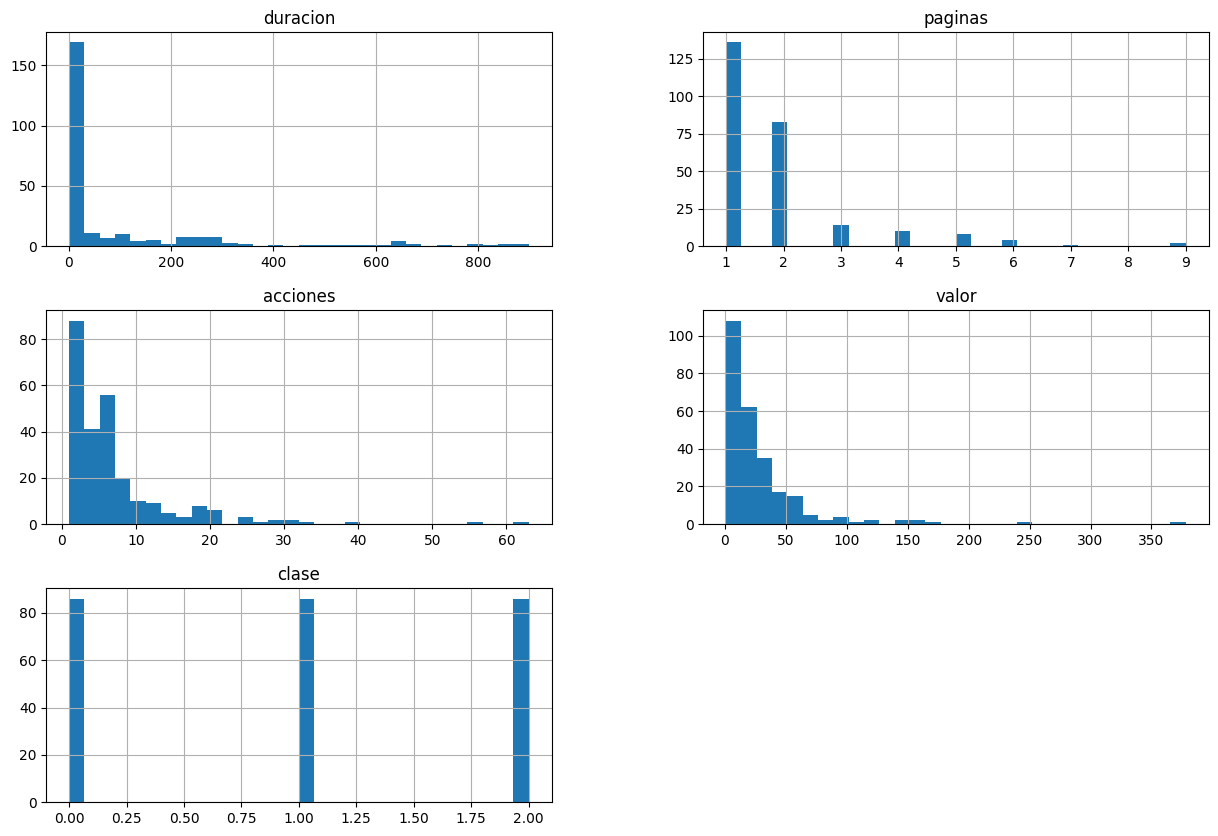

C:\Users\Christian\AppData\Local\Temp\ipykernel_17556\1087248409.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nuevo_archivo['duracion'], shade=True)


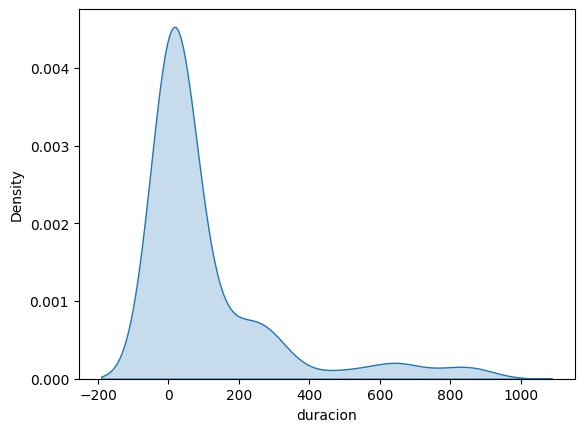

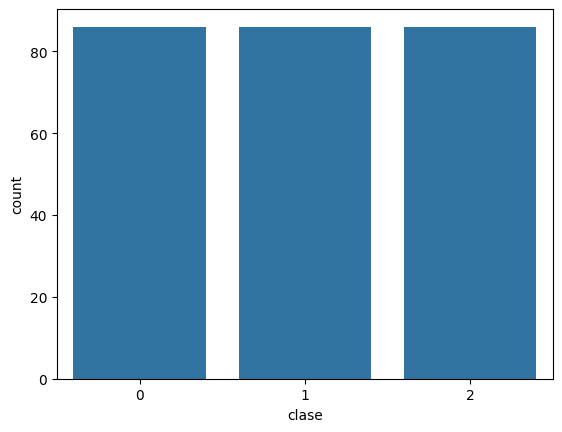

In [314]:
#quí visualizamos un poco de la distribución de los datos
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramas para variables numéricas
nuevo_archivo.hist(bins=30, figsize=(15, 10))
plt.show()

# Gráficos de densidad
sns.kdeplot(nuevo_archivo['duracion'], shade=True)
plt.show()

# Gráficos de barras para la variable categórica 'clase'
sns.countplot(x='clase', data=nuevo_archivo)
plt.show()

In [315]:
#Visualizaremos al distribución para la columna 'duracion' la cual nos permitará ver en un plano más amplio la distribución actual, asi como
#nos dara una idea de como podía ser su distribución normal
'''
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

def visualizar_campana(datos, columna):
    """
    Visualiza la distribución de los datos y ajusta una curva normal sobre ellos.
    
    Args:
        datos (pd.DataFrame): Conjunto de datos.
        columna (str): Nombre de la columna a analizar.
    """
    plt.figure(figsize=(10, 6))
    
    # Histograma de la columna
    sns.histplot(datos[columna], kde=True, color='blue', stat='density', bins=30, linewidth=0)
    
    # Ajustar una distribución normal a los datos
    mu, std = stats.norm.fit(datos[columna])
    
    # Graficar la curva de densidad ajustada
    xmin, xmax = plt.xlim()  # Obtener el rango de x para la distribución normal
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)  # Calcula la distribución normal ajustada
    plt.plot(x, p, 'r', label='Curva normal ajustada', linewidth=2)
    
    # Título y etiquetas
    plt.title(f'Distribución de {columna} con ajuste normal', fontsize=14)
    plt.xlabel(columna, fontsize=12)
    plt.ylabel('Densidad', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso con el DataFrame 'archivo'
visualizar_campana(archivo, 'duracion')
'''

'\nimport numpy as np\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport scipy.stats as stats\n\ndef visualizar_campana(datos, columna):\n    """\n    Visualiza la distribución de los datos y ajusta una curva normal sobre ellos.\n    \n    Args:\n        datos (pd.DataFrame): Conjunto de datos.\n        columna (str): Nombre de la columna a analizar.\n    """\n    plt.figure(figsize=(10, 6))\n    \n    # Histograma de la columna\n    sns.histplot(datos[columna], kde=True, color=\'blue\', stat=\'density\', bins=30, linewidth=0)\n    \n    # Ajustar una distribución normal a los datos\n    mu, std = stats.norm.fit(datos[columna])\n    \n    # Graficar la curva de densidad ajustada\n    xmin, xmax = plt.xlim()  # Obtener el rango de x para la distribución normal\n    x = np.linspace(xmin, xmax, 100)\n    p = stats.norm.pdf(x, mu, std)  # Calcula la distribución normal ajustada\n    plt.plot(x, p, \'r\', label=\'Curva normal ajustada\', linewidth=2)\n    \n    # Título y etiqu

En el gráfico superior podemos evidenciar que los datos no siguen una distribución gaussiana (En forma de campana), razón por la cual entendemos que debido al contexto de los datos (Es decir, que no son por ejemplo datos financieros) tendremos la presencia muy grande de outliers.

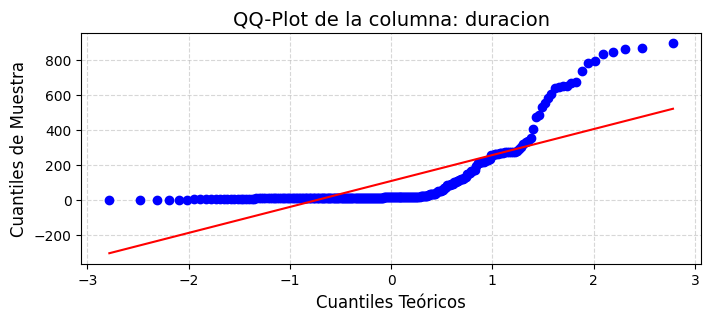

In [316]:
#Visualizamos a través de un gráfico QQ la distribución de los datos para la columna 'duracion' antes de ser procesados
import scipy.stats as stats
import matplotlib.pyplot as plt

# Ajustar el tamaño del gráfico
plt.figure(figsize=(8, 3))  # Cambia (10, 6) por las dimensiones deseadas (ancho, alto)

stats.probplot(nuevo_archivo['duracion'], dist="norm", plot=plt)
plt.title("QQ-Plot de la columna: duracion", fontsize=14)  # Ajuste opcional del tamaño del título
plt.xlabel("Cuantiles Teóricos", fontsize=12)  # Etiqueta del eje x
plt.ylabel("Cuantiles de Muestra", fontsize=12)  # Etiqueta del eje y
plt.grid(alpha=0.5, linestyle='--')  # Opcional: agregar una cuadrícula para mejorar la visualización
plt.show()


En el gráfico superior podemos evidenciar una desviación sumamente grande en los extremos de las colas, lo que sugiere que los datos no siguen una distribución normal. Así mismo, permite evidenciar una variabilidad de los datos lo que puede afectar la precisión de las estimaciones.

In [317]:
from scipy import stats

def prueba_normalidad_multicolumna(datos, columnas):
    """
    Realiza una prueba de normalidad de Shapiro-Wilk para múltiples columnas.
    
    Args:
        datos (pd.DataFrame): Conjunto de datos.
        columnas (list): Lista de nombres de columnas a analizar.
    """
    resultados = {}
    for columna in columnas:
        if columna not in datos.columns:
            print(f"La columna '{columna}' no está en el DataFrame. Se omitirá.")
            continue
        
        # Prueba de Shapiro-Wilk
        stat, p_value = stats.shapiro(datos[columna])
        resultados[columna] = {"Estadístico": stat, "p_value": p_value}
        
        # Mostrar resultados individuales
        print(f"\nColumna: {columna}")
        print(f"  Estadístico de prueba: {stat}")
        print(f"  Valor p: {p_value}")
        
        # Interpretación
        if p_value > 0.05:
            print("  Los datos probablemente siguen una distribución normal (no se rechaza la hipótesis nula).")
        else:
            print("  Los datos no siguen una distribución normal (se rechaza la hipótesis nula).")
    
    return resultados

# Ejemplo de uso con el DataFrame 'archivo'
if __name__ == "__main__":
    # Lista de columnas a analizar
    columnas_a_analizar = ['duracion', 'acciones', 'paginas', 'valor']  # Reemplaza con tus columnas
    resultados_normalidad = prueba_normalidad_multicolumna(nuevo_archivo, columnas_a_analizar)


Columna: duracion
  Estadístico de prueba: 0.5824219820090106
  Valor p: 1.691984535875855e-24
  Los datos no siguen una distribución normal (se rechaza la hipótesis nula).

Columna: acciones
  Estadístico de prueba: 0.6632304808325818
  Valor p: 2.5360428338348205e-22
  Los datos no siguen una distribución normal (se rechaza la hipótesis nula).

Columna: paginas
  Estadístico de prueba: 0.651685887204956
  Valor p: 1.1757413445511812e-22
  Los datos no siguen una distribución normal (se rechaza la hipótesis nula).

Columna: valor
  Estadístico de prueba: 0.5969986719528347
  Valor p: 3.9381993382703646e-24
  Los datos no siguen una distribución normal (se rechaza la hipótesis nula).


Como podemos evidenciar en los textos superiores, la prueba nos confirma que los datos no siguen una distribución normal

-------------------------------------------------------------------------------------------------------------------

***Detección de Outliers***

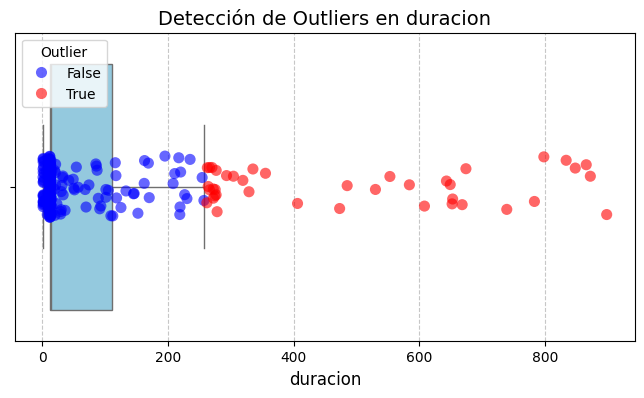

Total de outliers en 'duracion': 40 de 258 registros (15.50%).


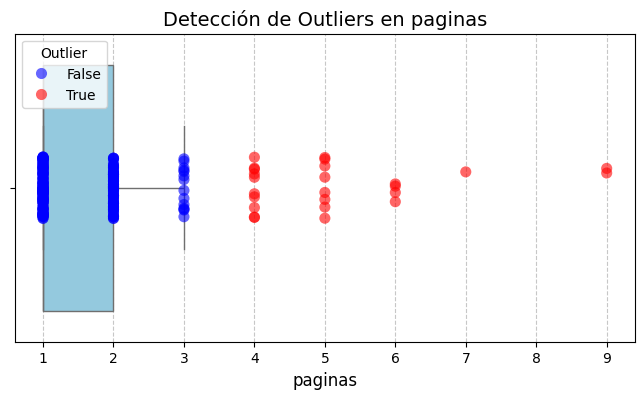

Total de outliers en 'paginas': 25 de 258 registros (9.69%).


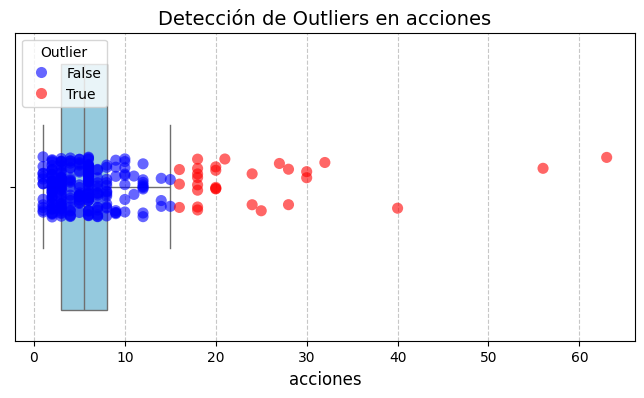

Total de outliers en 'acciones': 29 de 258 registros (11.24%).


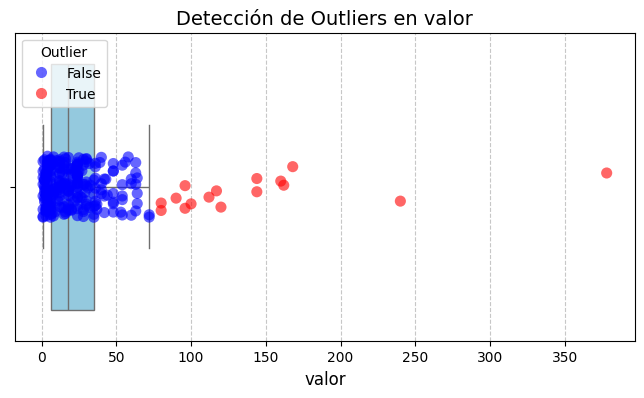

Total de outliers en 'valor': 16 de 258 registros (6.20%).


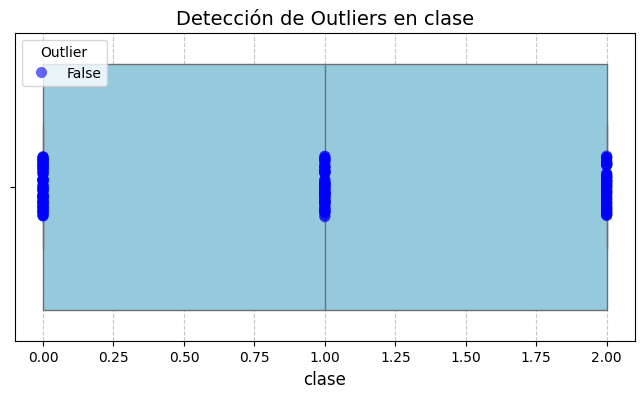

Total de outliers en 'clase': 0 de 258 registros (0.00%).


In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Función para detectar y visualizar outliers en múltiples columnas
def visualizar_outliers_multicolumna(datos, columnas):
    """
    Visualiza los outliers de múltiples columnas en un conjunto de datos.
    
    Args:
        datos (pd.DataFrame): Conjunto de datos.
        columnas (list): Lista de nombres de columnas a analizar.
    """
    for columna in columnas:
        if columna not in datos.columns:
            print(f"La columna '{columna}' no está en el DataFrame.")
            continue
        
        # Calcular percentiles y rango intercuartílico (IQR)
        Q1 = datos[columna].quantile(0.25)
        Q3 = datos[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Identificar outliers
        datos['Outlier'] = (datos[columna] < limite_inferior) | (datos[columna] > limite_superior)
        
        # Visualización
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=datos, x=columna, color="skyblue", showfliers=False)  # Boxplot sin los outliers originales
        sns.stripplot(
            data=datos, 
            x=columna, 
            hue="Outlier", 
            palette={False: "blue", True: "red"}, 
            size=8, 
            jitter=True, 
            alpha=0.6
        )
        plt.title(f'Detección de Outliers en {columna}', fontsize=14)
        plt.xlabel(columna, fontsize=12)
        plt.legend(title="Outlier", loc="upper left")
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.show()
        
        # Resumen de outliers
        total_outliers = datos['Outlier'].sum()
        print(f"Total de outliers en '{columna}': {total_outliers} de {len(datos)} registros ({total_outliers / len(datos) * 100:.2f}%).")

# Ejemplo de uso con el DataFrame 'archivo'
if __name__ == "__main__":
    # Asegúrate de que el DataFrame 'archivo' esté definido antes de llamar a la función
    try:
        columnas_a_analizar = ["duracion", "paginas", "acciones", "valor", "clase"]  # Reemplaza con tus columnas
        visualizar_outliers_multicolumna(nuevo_archivo, columnas_a_analizar)
    except NameError:
        print("El DataFrame 'archivo' no está definido. Por favor, define el DataFrame antes de ejecutar el script.")


Como podemos evidenciar en los gráficos superiores, la presencia de outliers es sumamente alta, lo que genera que no haya una distribución normal de los datos.

***Tratamiento de outliers***

Para este caso y teniendo en cuenta los datos explorados, se ha determinado imputar los datos, ya que al tener una presencia importante dentro del dataset eliminarnos no sería la mejor opción.

In [319]:
import pandas as pd
import numpy as np

# Función para imputar outliers con la mediana
def imputar_outliers_con_mediana(df, columnas):
    """
    Identifica outliers usando el rango intercuartílico (IQR) y los reemplaza por la mediana.
    Args:
        df (pd.DataFrame): Dataset a procesar.
        columnas (list): Lista de columnas donde buscar outliers.
    Returns:
        pd.DataFrame: DataFrame con outliers imputados.
    """
    df = df.copy()  # Para no modificar el original
    for col in columnas:
        # Calcular el rango intercuartílico (IQR)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir límites para identificar outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Imputar valores fuera de los límites con la mediana
        mediana = df[col].median()
        df[col] = np.where((df[col] < limite_inferior) | (df[col] > limite_superior), mediana, df[col])
    
    return df

# Ejemplo de uso
if __name__ == "__main__":

    # Imputar outliers en las columnas 'A' y 'B'
    columnas_a_imputar = ['duracion', 'acciones', 'paginas', 'valor']
    archivo_imputado = imputar_outliers_con_mediana(nuevo_archivo, columnas_a_imputar)


In [320]:
    
print("\nDespués de imputar outliers:")
archivo_imputado


Después de imputar outliers:


,duracion,paginas,acciones,valor,clase,Outlier
0,7.000000,2.0,4.0,8.0,2,False
1,21.000000,2.0,6.0,6.0,2,False
2,57.000000,2.0,4.0,4.0,2,False
3,101.000000,3.0,6.0,12.0,2,False
4,109.000000,2.0,6.0,12.0,2,False
...,...,...,...,...,...,...
253,12.000000,1.0,2.0,2.0,2,False
254,11.013113,1.0,2.0,4.0,2,False
255,14.822042,1.0,2.0,4.0,2,False
256,12.000000,1.0,3.0,3.0,2,False


En el dataframe superior podemos evidenciar una nueva columna llamada 'Outlier' que nos indica que los datos han sido imputados correctamente.
Así mismo, muestra según la fila False si los datos no fueron imputados y True en caso de que si lo fueran.

In [321]:
archivo_transformado = archivo_imputado.drop(columns=['Outlier'])
archivo_transformado

,duracion,paginas,acciones,valor,clase
0,7.000000,2.0,4.0,8.0,2
1,21.000000,2.0,6.0,6.0,2
2,57.000000,2.0,4.0,4.0,2
3,101.000000,3.0,6.0,12.0,2
4,109.000000,2.0,6.0,12.0,2
...,...,...,...,...,...
253,12.000000,1.0,2.0,2.0,2
254,11.013113,1.0,2.0,4.0,2
255,14.822042,1.0,2.0,4.0,2
256,12.000000,1.0,3.0,3.0,2


---------------------------------------------------------------------------------

***Relaciones y correlaciones entre variables***



Para este análisis en particular y de acuerdo al objetivo del análisis, no es necesario considerar relaciones y correlaciones.

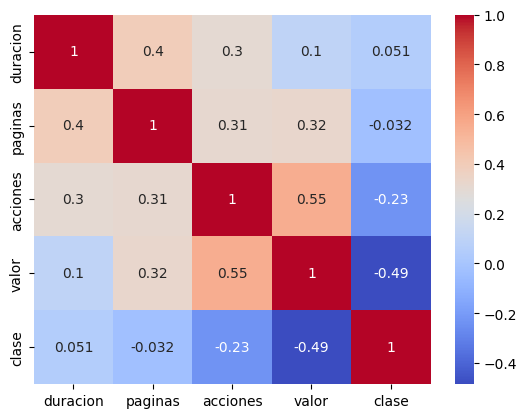

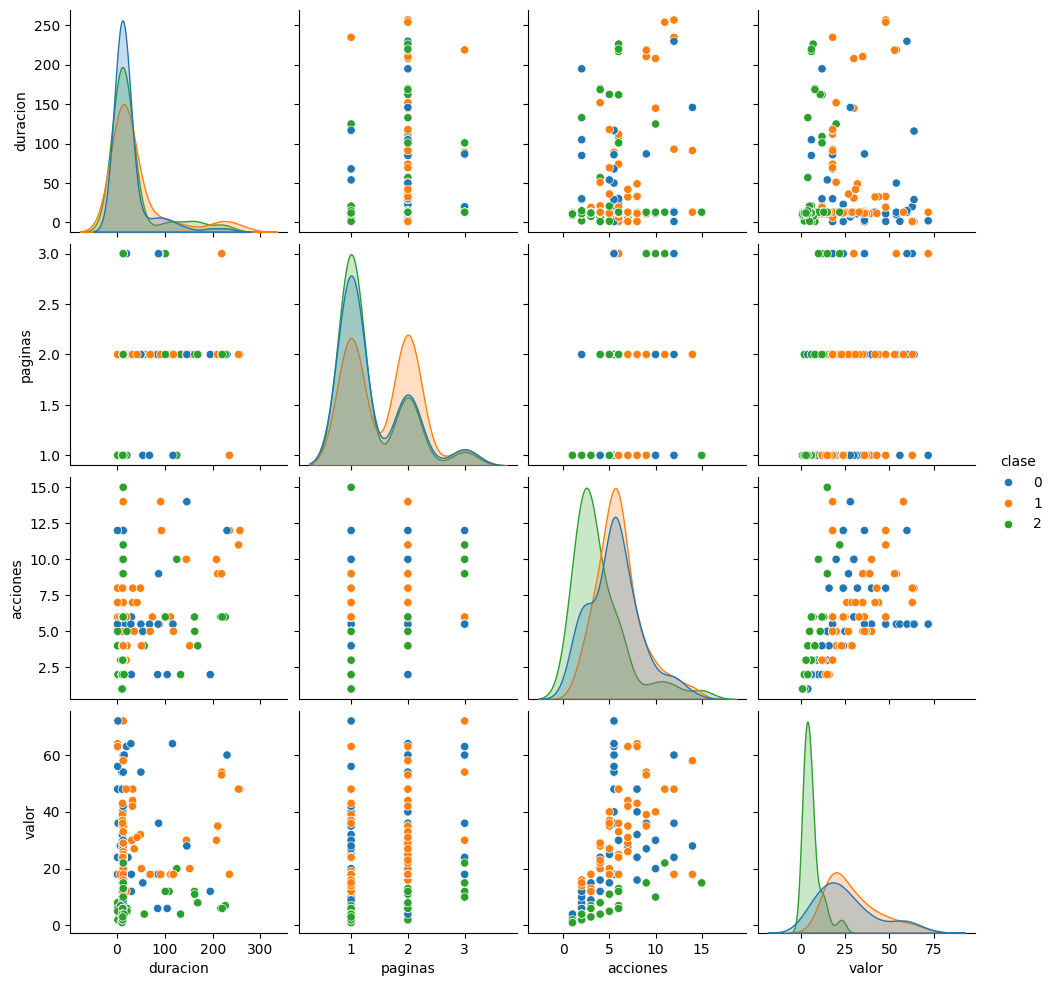

In [322]:
# Matriz de correlación
corr_matrix = archivo_transformado.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Gráficos de dispersión para explorar relaciones
sns.pairplot(archivo_transformado, hue='clase', palette="tab10")
plt.show()

--------------------------------------------------------

***Transformación de datos***

In [323]:
#Usamos la transformación de Yeo-Johnson para transformar considerando que al trabajar con valores negativos y positivos puede ser de mayor robustez
from sklearn.preprocessing import PowerTransformer

# Inicializar el transformador con Yeo-Johnson
transformer = PowerTransformer(method='yeo-johnson')

# Excluir la columna 'clase' de la transformación
columnas_a_transformar = archivo_transformado.columns.difference(['clase'])

# Aplicar la transformación solo a las columnas numéricas
archivo_trans = transformer.fit_transform(archivo_transformado[columnas_a_transformar])

# Convertir nuevamente a DataFrame con los nombres de columnas correctos
archivo_trans = pd.DataFrame(archivo_trans, columns=columnas_a_transformar)

# Volver a agregar la columna 'clase' sin transformación
archivo_trans['clase'] = archivo_transformado['clase']
archivo_trans

,acciones,duracion,paginas,valor,clase
0,-0.263989,-0.730606,1.227003,-0.638729,2
1,0.448089,0.330604,1.227003,-0.882574,2
2,-0.263989,1.171420,1.227003,-1.188414,2
3,0.448089,1.593659,1.619870,-0.256440,2
4,0.448089,1.646746,1.227003,-0.256440,2
...,...,...,...,...,...
253,-1.267874,-0.195569,-0.773412,-1.611097,2
254,-1.267874,-0.279216,-0.773412,-1.188414,2
255,-1.267874,0.007155,-0.773412,-1.188414,2
256,-0.713590,-0.195569,-0.773412,-1.378976,2


In [324]:
columnas_a_analizar2 = 'duracion', 'paginas', 'valor', 'clase'
prueba_normalidad_multicolumna(archivo_trans, columnas_a_analizar2)


Columna: duracion
  Estadístico de prueba: 0.8128727598570973
  Valor p: 6.287847245390008e-17
  Los datos no siguen una distribución normal (se rechaza la hipótesis nula).

Columna: paginas
  Estadístico de prueba: 0.643682825383728
  Valor p: 6.979369587500721e-23
  Los datos no siguen una distribución normal (se rechaza la hipótesis nula).

Columna: valor
  Estadístico de prueba: 0.9709040231104773
  Valor p: 4.064493583913812e-05
  Los datos no siguen una distribución normal (se rechaza la hipótesis nula).

Columna: clase
  Estadístico de prueba: 0.792980767458231
  Valor p: 8.479311307506224e-18
  Los datos no siguen una distribución normal (se rechaza la hipótesis nula).


{'duracion': {'Estadístico': np.float64(0.8128727598570973),
  'p_value': np.float64(6.287847245390008e-17)},
 'paginas': {'Estadístico': np.float64(0.643682825383728),
  'p_value': np.float64(6.979369587500721e-23)},
 'valor': {'Estadístico': np.float64(0.9709040231104773),
  'p_value': np.float64(4.064493583913812e-05)},
 'clase': {'Estadístico': np.float64(0.792980767458231),
  'p_value': np.float64(8.479311307506224e-18)}}

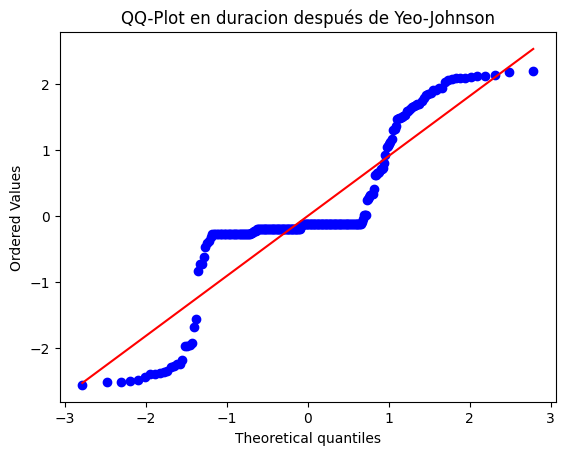

In [325]:
import scipy.stats as stats

stats.probplot(archivo_trans['duracion'], dist="norm", plot=plt)
plt.title("QQ-Plot en duracion después de Yeo-Johnson")
plt.show()

En este punto, podemos evidenciar que después de utilizar imputación y la yeo-johnson para transformar la distribución de los datos, la distribución de los mismos tiende a mejorar, la última visualización nos da una confirmación.

-----------------------------------------------------------------------

***Aplicación del modelo - Regresión Logística***

In [326]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Definir variables independientes (X) y dependiente (y)
X = archivo_trans[['duracion', 'paginas', 'acciones', 'valor']]
y = archivo_trans['clase']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6923076923076923
[[16  8  4]
 [12 13  0]
 [ 0  0 25]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57        28
           1       0.62      0.52      0.57        25
           2       0.86      1.00      0.93        25

    accuracy                           0.69        78
   macro avg       0.68      0.70      0.69        78
weighted avg       0.68      0.69      0.68        78



C:\Users\Christian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [327]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([1])